# DOG BREED CLASSIFICATION

---
![](https://www.thesprucepets.com/thmb/BqcHGB_H1lPxcSlKMobDbrOnBOY=/1500x0/filters:no_upscale():strip_icc()/GettyImages-175928868-120f47906f4849969fcdab28e2e4f494.jpg)


This project aims to develop a model capable of classifying dog breeds from images. The model will leverage transfer learning with the pre-trained MobileNetV2 model and utilize image data augmentation techniques to improve its generalization ability.

## Project Description

1. Data Acquisition and Preprocessing:

  We will utilize the publicly available Oxford dog breed dataset containing images of various dog breeds.

  The `ImageDataGenerator` class from the Keras library will be used to perform image preprocessing tasks such as resizing, normalization, and data augmentation.
  Data augmentation techniques like random flips, rotations, and zooms will be employed to artificially increase the dataset size and improve model robustness to variations in image orientation and scale.

2. Model Development:

  The pre-trained `MobileNetV2` model will be employed for transfer learning. MobileNet is a convolutional neural networks (CNN) architectures pre-trained on a massive image dataset (ImageNet) for image classification tasks.
  We will freeze the pre-trained layers of MobileNetV2 and add new trainable layers on top to adapt the model for dog breed classification. This approach leverages the learned features from MobileNet and fine-tunes them for the specific task.

3. Model Training and Evaluation:

  The preprocessed dataset will be split into training and validation sets.
  The model will be trained on the training set using an appropriate optimizer and loss function (Adam optimizer and categorical cross-entropy loss).
  The validation set will be used to monitor model performance during training and prevent overfitting.

## Expected Outcomes:

  * A well-trained dog breed classifier model with high accuracy on unseen data.
  * Insights into the effectiveness of transfer learning with MobileNet and data augmentation techniques for dog breed classification.
  * A potential web or mobile application for dog breed identification.

# Importing

Let's start with some imports

In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Models
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import tensorflow_hub as hub
# Optimzers
from keras.optimizers import Adam, legacy
# Callbacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
# Data Augmentation and preprocessing
from keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_path = '/content/drive/MyDrive/dog_breed_dataset/dog_breed_stanford.zip'

extract_dir = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_dir)

# Dataset

Here, we'll define the path to our dataset.

In [4]:
dir = '/content/images/Images'
print(dir)

/content/images/Images


# Data Augmentation

Improve model robustness to variations in image orientation and scale.

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=100,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_generator = validation_datagen.flow_from_directory(
    dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=100,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [6]:
class_names = train_generator.class_indices.keys()
class_names

dict_keys(['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Y

In [7]:
names=[]
for name in class_names:
  names.append(name.split("-")[1])
print(names[:10])

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound']


Let's visualize some images

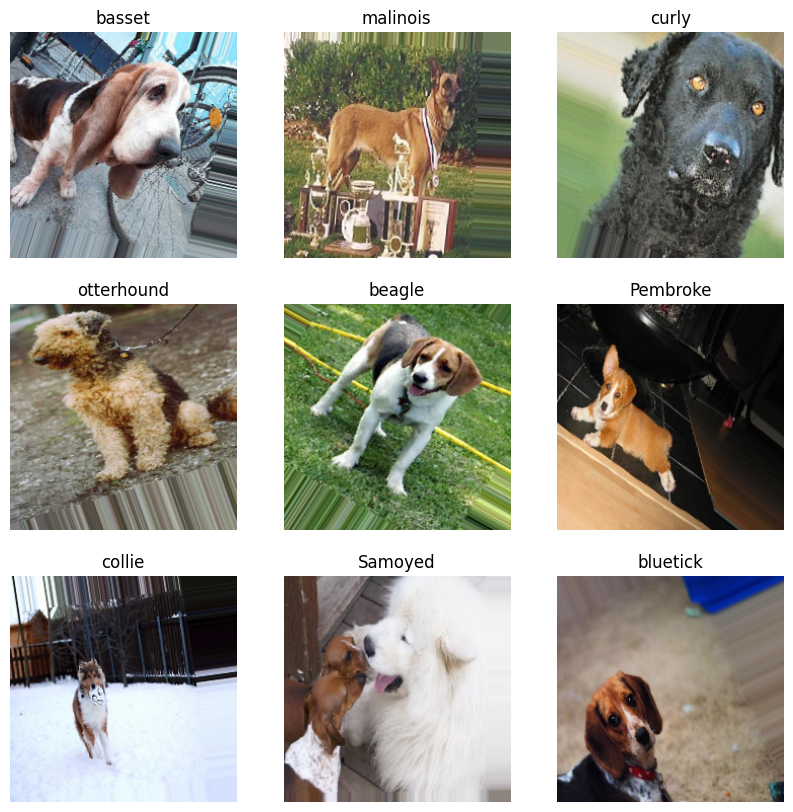

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(names[np.argmax(labels[i])])
    plt.axis("off")
  break

In [8]:
folders = glob("/content/images/Images/*")
len(folders)

120

# Model creation
We're going to use a technique called transfer lerning.
We'll load a pretrained model, in this case the MobilenetV2 and VGG16.


## Steps:

* Load the pretrained model.
* Add Flatten() and Dense Layers.
* Create a model.

In [9]:
epochs = 10
lr = 1e-3
IMG_SHAPE_MobileNet = (None, 224, 224, 3)
IMG_SHAPE_VGG16 = (224, 224, 3)




In [10]:
from tensorflow.keras.applications import MobileNetV2

In [11]:
mobile_net = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in mobile_net.layers:
  layer.trainable = False

x = mobile_net.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(120, activation='softmax')(x)

mobile_model = tf.keras.Model(inputs=mobile_net.input, outputs=predictions)

mobile_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 [==============================] - 1s 0us/step


In [15]:
from tensorflow.keras.applications import InceptionV3

In [19]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in mobile_net.layers:
  layer.trainable = False

x = inception.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(120, activation='softmax')(x)

inception_model = tf.keras.Model(inputs=inception.input, outputs=predictions)

inception_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# URL= 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'
# model = tf.keras.Sequential([
#       hub.KerasLayer(URL),
#       tf.keras.layers.Dense(units=120, activation="softmax")
#   ])

# model.compile(
#     optimizer=legacy.Adam(learning_rate=0.0001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [12]:
best_mobilenet_model = "/content/drive/MyDrive/best_model_mobilenet.h5"



early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
checkpoint1 = ModelCheckpoint(best_mobilenet_model, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint2 = ModelCheckpoint(best_mobilenet_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
callbacks_list = [checkpoint1, checkpoint2, early_stopping]

In [13]:
history = mobile_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=callbacks_list
)

Epoch 1/10
166/166 [==============================] - ETA: 0s - loss: 2.7863 - accuracy: 0.4119
Epoch 1: val_loss improved from inf to 1.33718, saving model to /content/drive/MyDrive/best_model_mobilenet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_accuracy improved from -inf to 0.67092, saving model to /content/drive/MyDrive/best_model_mobilenet.h5
166/166 [==============================] - 273s 2s/step - loss: 2.7863 - accuracy: 0.4119 - val_loss: 1.3372 - val_accuracy: 0.6709
Epoch 2/10
166/166 [==============================] - ETA: 0s - loss: 2.1162 - accuracy: 0.5545
Epoch 2: val_loss did not improve from 1.33718

Epoch 2: val_accuracy improved from 0.67092 to 0.69352, saving model to /content/drive/MyDrive/best_model_mobilenet.h5
166/166 [==============================] - 268s 2s/step - loss: 2.1162 - accuracy: 0.5545 - val_loss: 1.4489 - val_accuracy: 0.6935
Epoch 3/10
166/166 [==============================] - ETA: 0s - loss: 1.9159 - accuracy: 0.5944
Epoch 3: val_loss did not improve from 1.33718

Epoch 3: val_accuracy improved from 0.69352 to 0.70751, saving model to /content/drive/MyDrive/best_model_mobilenet.h5
166/166 [==============================] - 264s 2s/step - loss: 1.9159 - accuracy: 0.5944 - v

# Loss and Accuracy curves

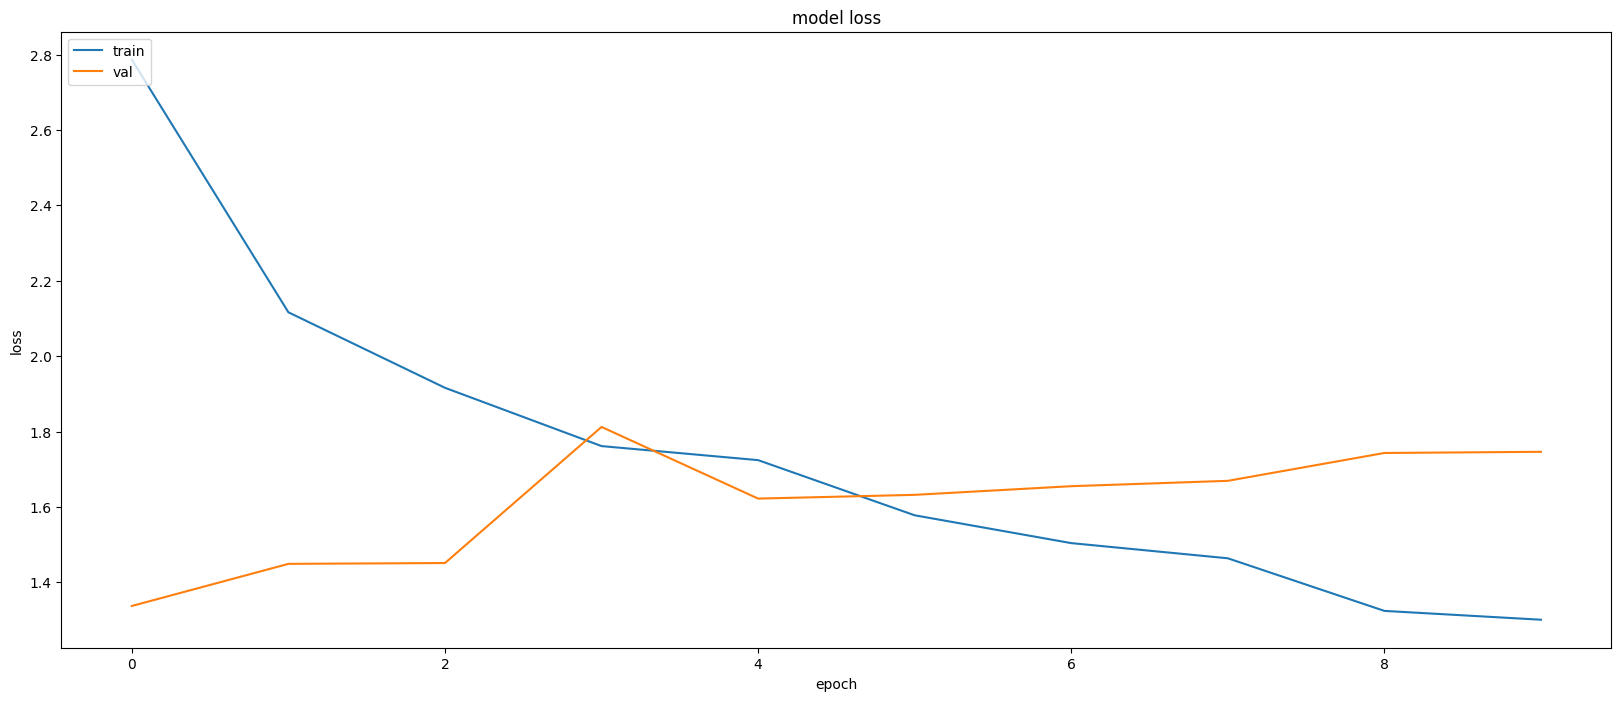

In [21]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

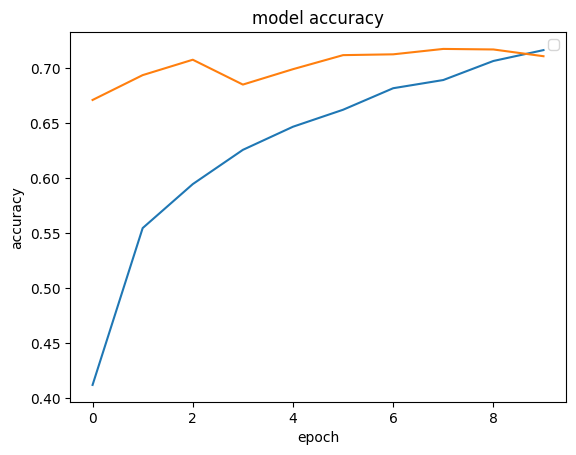

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()